In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [26]:
df = pd.read_csv('Supermart_Grocery_Sales.csv')  # use your correct filename
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [27]:
# Drop duplicates and missing values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Convert 'Order Date' safely
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=False, errors='coerce')

# Remove rows where date conversion failed (optional)
df = df[df['Order Date'].notna()]

# Extract components
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.strftime('%B')


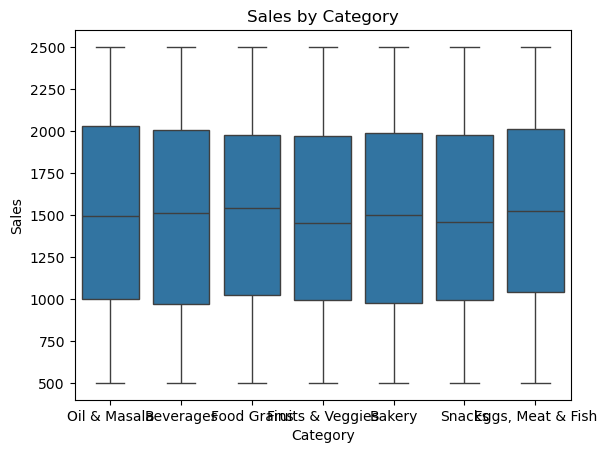

In [8]:
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales by Category')
plt.show()

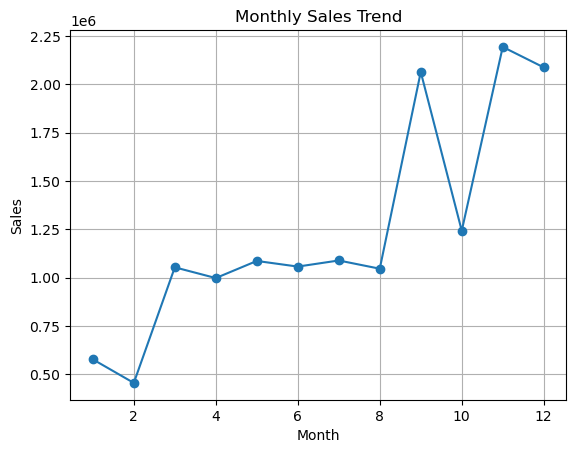

In [9]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()


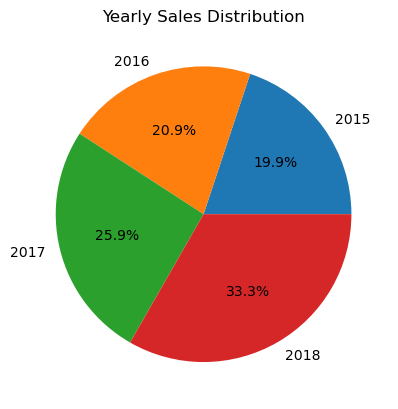

In [10]:
yearly_sales = df.groupby('Order Year')['Sales'].sum()
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%')
plt.title("Yearly Sales Distribution")
plt.show()


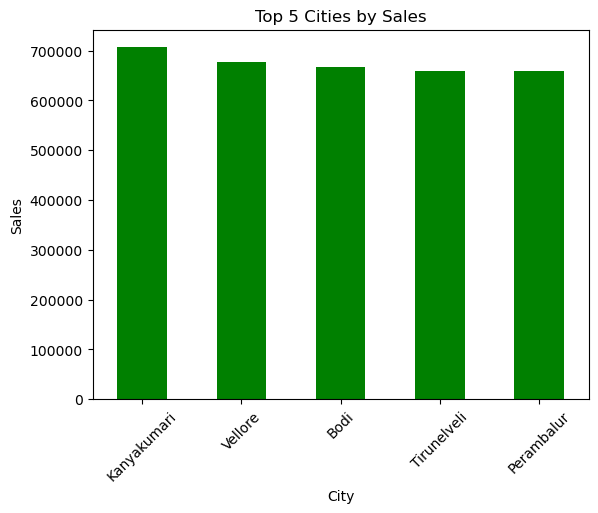

In [11]:
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(5)
top_cities.plot(kind='bar', color='green')
plt.title("Top 5 Cities by Sales")
plt.ylabel("Sales")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()


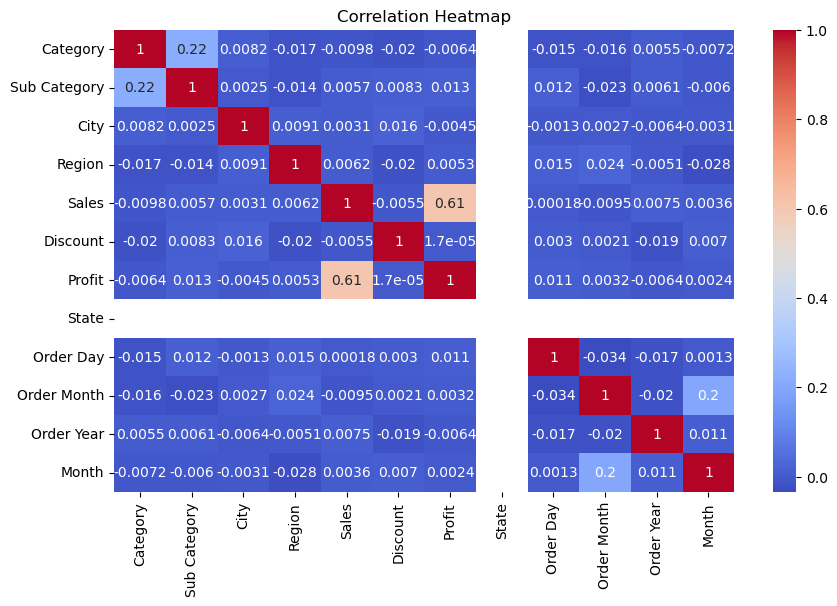

In [16]:
plt.figure(figsize=(10, 6))

# Include only numeric columns
corr = df.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [23]:
le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    df[col] = le.fit_transform(df[col])

# Features and Target
X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 212935.59
R-squared Score: 0.35


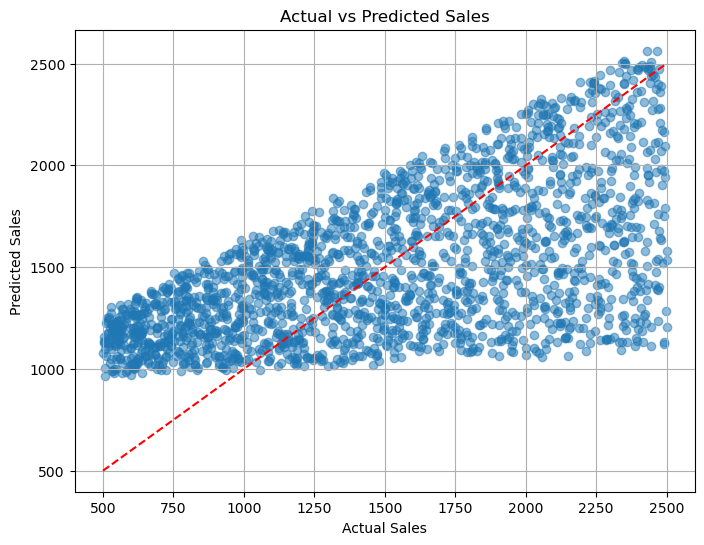

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
